In [82]:
import numpy as np
import pandas as pd
import seaborn as sns

# Plotting setup
%matplotlib inline
import matplotlib.pyplot as plt


# Load data

In [83]:
data_file = 'data/house.csv'
housing = pd.read_csv(data_file)

According to the task, only some columns of the dataset are to be used

In [84]:
features = ['id', 'date', 'price', 'price_bin',
                 'bedrooms', 'bathrooms', 'sqft_living',
                 'sqft_lot', 'floors', 'waterfront',
                'view', 'condition', 'grade', 
                'sqft_above', 'sqft_basement', 'yr_built']

housing = housing[features]

# First look at the data

In [85]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 16 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
price_bin        21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
dtypes: float64(3), int64(12), object(1)
memory usage: 2.6+ MB


In [86]:
housing.describe()

,id,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,0.067783,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136
std,2.876566e+09,3.673622e+05,0.251379,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411
min,1.000102e+06,7.500000e+04,0.000000,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000
25%,2.123049e+09,3.219500e+05,0.000000,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000
50%,3.904930e+09,4.500000e+05,0.000000,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000
75%,7.308900e+09,6.450000e+05,0.000000,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000
max,9.900000e+09,7.700000e+06,1.000000,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000


In [87]:
housing.head()

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,20141013T000000,221900.0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,5631500400,20150225T000000,180000.0,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,2487200875,20141209T000000,604000.0,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,1954400510,20150218T000000,510000.0,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


In [88]:
housing[housing['bathrooms'] % 1 != 0]

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
1,6414100192,20141209T000000,538000.0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
5,7237550310,20140512T000000,1230000.0,1,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001
6,1321400060,20140627T000000,257500.0,0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995
7,2008000270,20150115T000000,291850.0,0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963
9,3793500160,20150312T000000,323000.0,0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009
21609,6600060120,20150223T000000,400000.0,0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014
21610,1523300141,20140623T000000,402101.0,0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009
21611,291310100,20150116T000000,400000.0,0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004


In [89]:
housing[housing['floors'] % 1 != 0]

,id,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
12,114101516,20140528T000000,310000.0,0,3,1.00,1430,19901,1.5,0,0,4,7,1430,0,1927
14,1175000570,20150312T000000,530000.0,0,5,2.00,1810,4850,1.5,0,0,3,7,1810,0,1900
17,6865200140,20140529T000000,485000.0,0,4,1.00,1600,4300,1.5,0,0,4,7,1600,0,1916
25,1202000200,20141103T000000,233000.0,0,3,2.00,1710,4697,1.5,0,0,5,6,1710,0,1941
27,3303700376,20141201T000000,667000.0,0,3,1.00,1400,1581,1.5,0,0,5,8,1400,0,1909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21345,3630200480,20140612T000000,680000.0,0,3,2.50,2570,3600,2.5,0,0,3,9,2570,0,2007
21386,774101755,20150417T000000,320000.0,0,3,1.75,1790,66250,1.5,0,0,3,7,1790,0,2003
21457,3629700120,20141014T000000,669950.0,0,3,3.00,2330,1944,2.5,0,0,3,8,1950,380,2014
21502,2770601782,20140801T000000,453000.0,0,3,2.50,1510,1618,2.5,0,0,3,8,1330,180,2011


For now, we can assume that the 0.75 bathroom is a bathroom without a shower/bathtub, and that the 'uneven' floors are non-standard, e.g. the attic. 

In a real project, this would be a great moment to ask about this kind of issues.

Let's also check if we have any NaNs in our data set.

In [90]:
housing['waterfront'].value_counts()

0    21450
1      163
Name: waterfront, dtype: int64

In [91]:
housing['view'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: view, dtype: int64

# Preliminary cleaning

Since the 'id' column does not provide us with any additional information, we will also get rid of it

In [92]:
housing.drop(['id'], axis=1, inplace=True)

The 'date' column could be much nicer, lets go ahead and do that:

In [93]:
housing['date'] = pd.to_datetime(housing['date'])

In [94]:
housing.head()

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,2014-10-13,221900.0,0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,2014-12-09,538000.0,0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,2015-02-25,180000.0,0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,2014-12-09,604000.0,0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,2015-02-18,510000.0,0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


# Train-test split

Lets split the data to not leak any information from the set we will be testing on.

In [95]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [96]:
housing_full = housing.copy()
housing = train_set.copy()

Already looking a bit better, lets now take a look at the distributions. This is not a very big data and we do not have too many features. Thus, we have chance to plot most of them and reach some useful analytical results. 

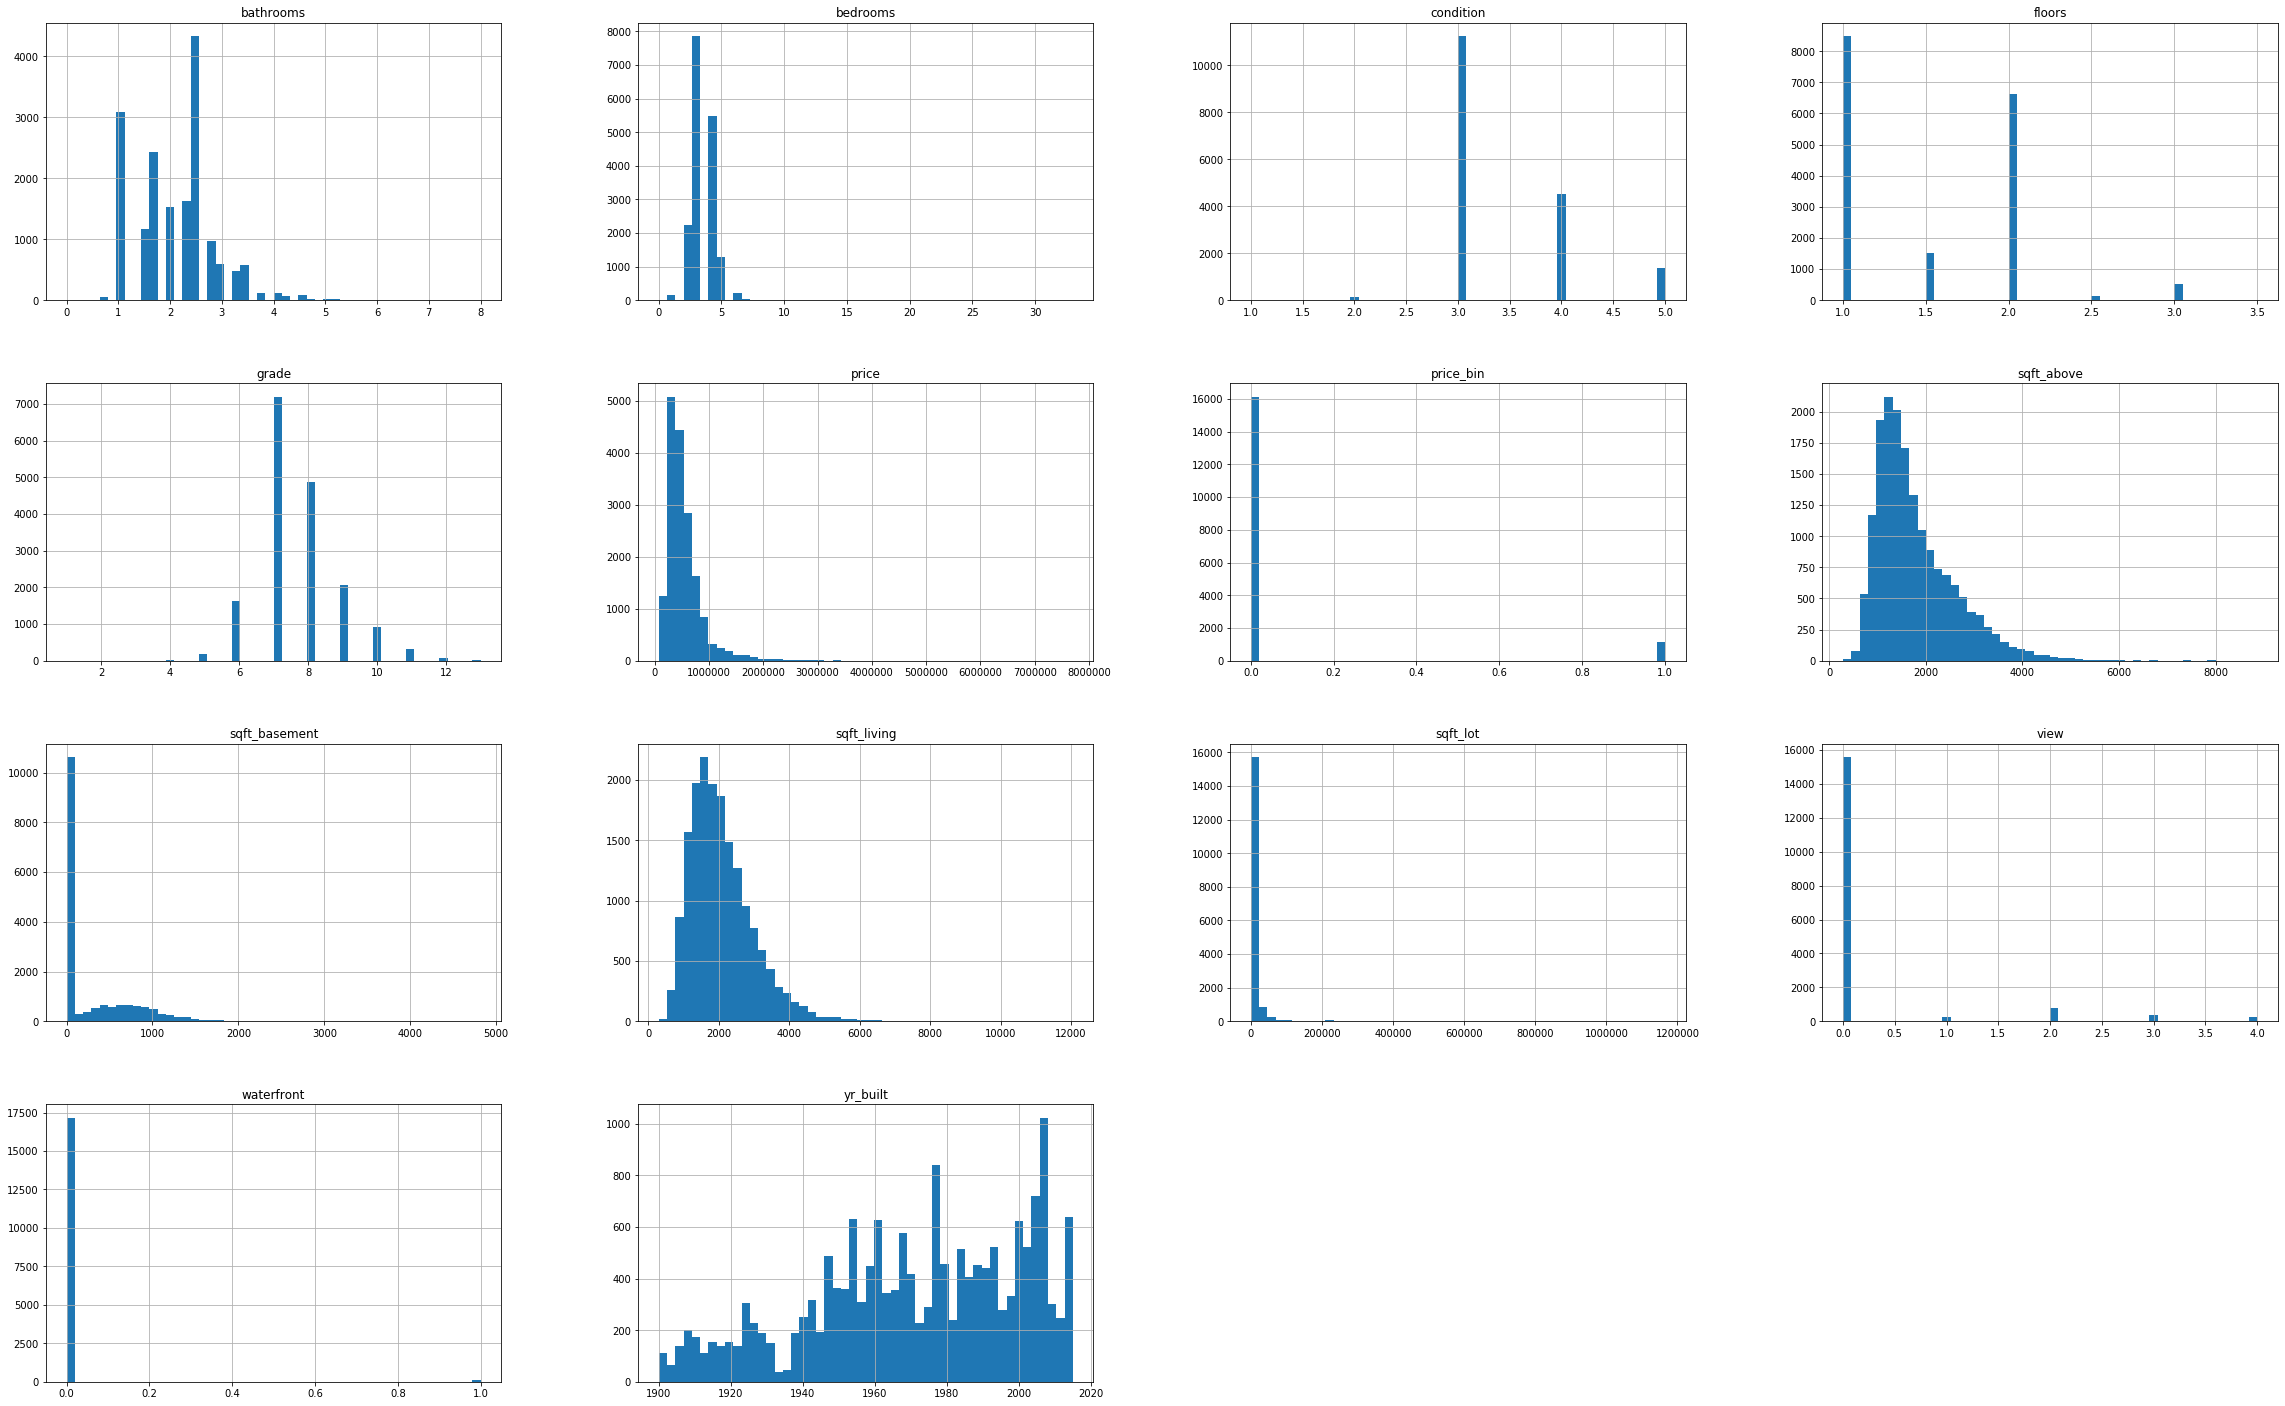

In [97]:
ax = housing.hist(bins=50, figsize=(40, 25))

We can already see some possible problems with this dataset - especially with bedrooms, price and sqft_lot which have a very long-tailed distribution. This might be pesky to deal with later, so we will try to clean it up before creating a model.

Let's see what we can do with the bedrooms first.

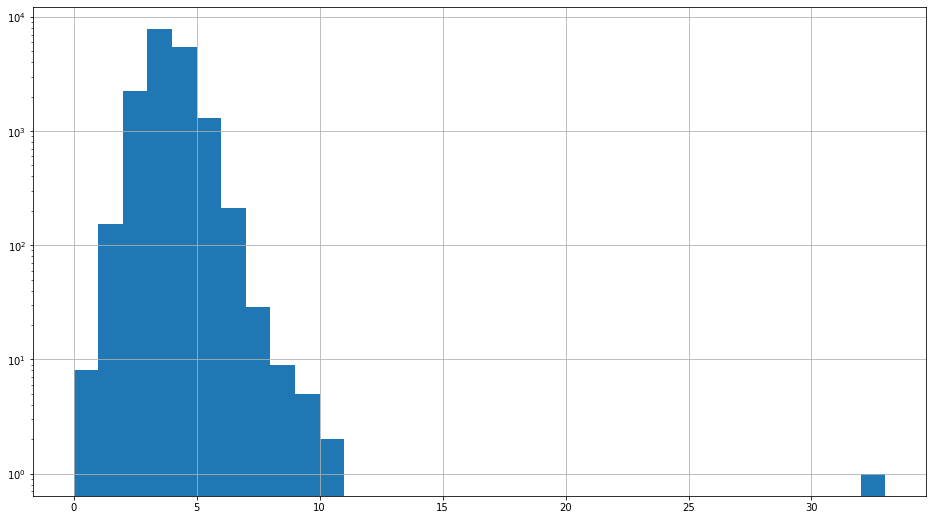

In [98]:
# Histogram with logarythmic scale to better visualize the outlier
housing['bedrooms'].hist(bins=33, log=True, figsize=(16, 9))

In [99]:
counts = housing['bedrooms'].value_counts(ascending=True)
print(counts)

33       1
10       2
9        5
0        8
8        9
7       29
1      153
6      212
5     1292
2     2237
4     5477
3     7865
Name: bedrooms, dtype: int64


As suspected, we have the most data in the 1-6 bedroom range, with several outliers - one of the houses has 33 bedrooms, and some of them have none (!). Let's examine them and see if we can find a pattern

In [100]:
bedroom_outlier = housing.loc[(housing['bedrooms'] == 33) | (housing['bedrooms'] == 0)]
bedroom_outlier

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
3119,2015-02-05,380000.0,0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006
3467,2014-08-05,288000.0,0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999
15870,2014-06-25,640000.0,0,33,1.75,1620,6000,1.0,0,0,5,7,1040,580,1947
6994,2014-06-24,1300000.0,1,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990
19452,2014-09-26,142000.0,0,0,0.00,290,20875,1.0,0,0,1,1,290,0,1963
8484,2014-09-25,240000.0,0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003
4868,2014-10-02,228000.0,0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953
12653,2015-02-18,320000.0,0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999
14423,2015-04-13,139950.0,0,0,0.00,844,4269,1.0,0,0,4,7,844,0,1913


33 bedrooms in 1620sqft seems very suspicious. Lets compare this with similar apartments:

In [101]:
housing.loc[housing['sqft_living'] == 1620].describe()

,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
count,83.000000,83.0,83.000000,83.000000,83.0,83.000000,83.000000,83.0,83.000000,83.000000,83.000000,83.000000,83.000000,83.000000
mean,443350.578313,0.0,3.469880,1.870482,1620.0,10357.048193,1.530120,0.0,0.216867,3.506024,7.265060,1440.000000,180.000000,1965.409639
std,145783.360677,0.0,3.328873,0.511099,0.0,25407.536708,0.631246,0.0,0.827105,0.722014,0.564916,243.570994,243.570994,31.152667
min,218000.000000,0.0,2.000000,1.000000,1620.0,997.000000,1.000000,0.0,0.000000,3.000000,6.000000,830.000000,0.000000,1900.000000
25%,333975.000000,0.0,3.000000,1.500000,1620.0,3777.500000,1.000000,0.0,0.000000,3.000000,7.000000,1220.000000,0.000000,1947.000000
50%,430000.000000,0.0,3.000000,1.750000,1620.0,6000.000000,1.500000,0.0,0.000000,3.000000,7.000000,1620.000000,0.000000,1966.000000
75%,525000.000000,0.0,3.000000,2.250000,1620.0,8128.500000,2.000000,0.0,0.000000,4.000000,8.000000,1620.000000,400.000000,1989.000000
max,842000.000000,0.0,33.000000,2.750000,1620.0,219542.000000,3.000000,0.0,4.000000,5.000000,9.000000,1620.000000,790.000000,2014.000000


As expected, the actual number of bedrooms in similar apartments is much lower, around 3.5. We can assume for now that this value has been entered incorrectly, and change it to the mean (4), as most of the other fields for this record seem to be in the correct range.

In [102]:
housing.loc[15870, 'bedrooms'] = 4

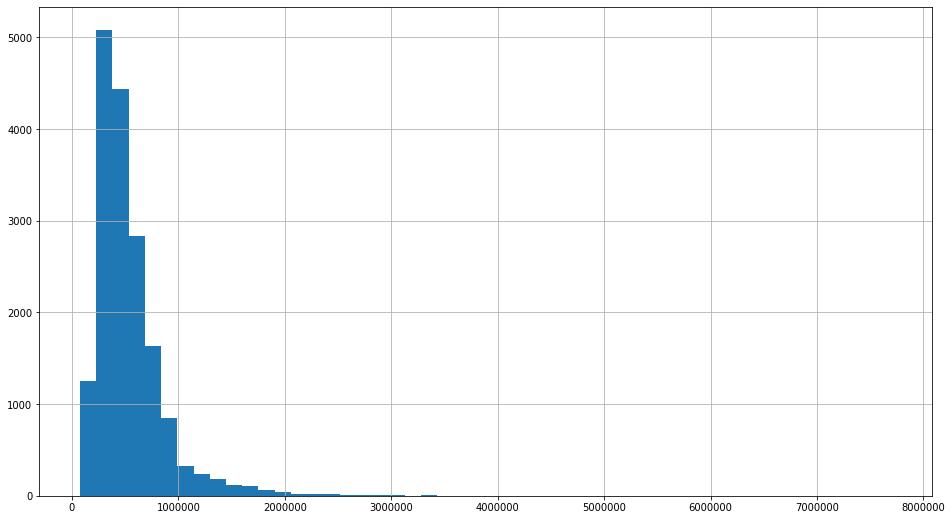

In [103]:
housing['price'].hist(bins=50, figsize=(16, 9))

Let's now check the record with the highest price

In [104]:
housing.sort_values(by=['price'], ascending=False).head(10)

,date,price,price_bin,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
7252,2014-10-13,7700000.0,1,6,8.00,12050,27600,2.5,0,3,4,13,8570,3480,1910
3914,2014-06-11,7060000.0,1,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940
9254,2014-09-19,6890000.0,1,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001
1315,2015-04-13,5300000.0,1,6,6.00,7390,24829,2.0,1,4,4,12,5000,2390,1991
1164,2014-10-20,5110000.0,1,5,5.25,8010,45517,2.0,1,4,3,12,5990,2020,1999
8092,2014-06-17,4670000.0,1,5,6.75,9640,13068,1.0,1,4,3,12,4820,4820,1983
8638,2014-06-18,4490000.0,1,4,3.00,6430,27517,2.0,0,0,3,12,6430,0,2001
12370,2015-05-06,4210000.0,1,5,6.00,7440,21540,2.0,0,0,3,12,5550,1890,2003
7035,2014-07-01,3800000.0,1,5,5.50,7050,42840,1.0,0,2,4,13,4320,2730,1978
19017,2014-09-11,3800000.0,1,3,4.25,5510,35000,2.0,0,4,3,13,4910,600,1997


This looks possible, as all of these properties have a very high grade, huge living area and are in decent condition.

In [105]:
correlation_matrix = housing.corr()
correlations = correlation_matrix['price'].sort_values(ascending=False)
print(correlations)

price            1.000000
price_bin        0.730590
sqft_living      0.701705
grade            0.665119
sqft_above       0.603254
bathrooms        0.526618
view             0.392175
sqft_basement    0.321399
bedrooms         0.317157
floors           0.253411
waterfront       0.252936
sqft_lot         0.091033
yr_built         0.049075
condition        0.036365
Name: price, dtype: float64


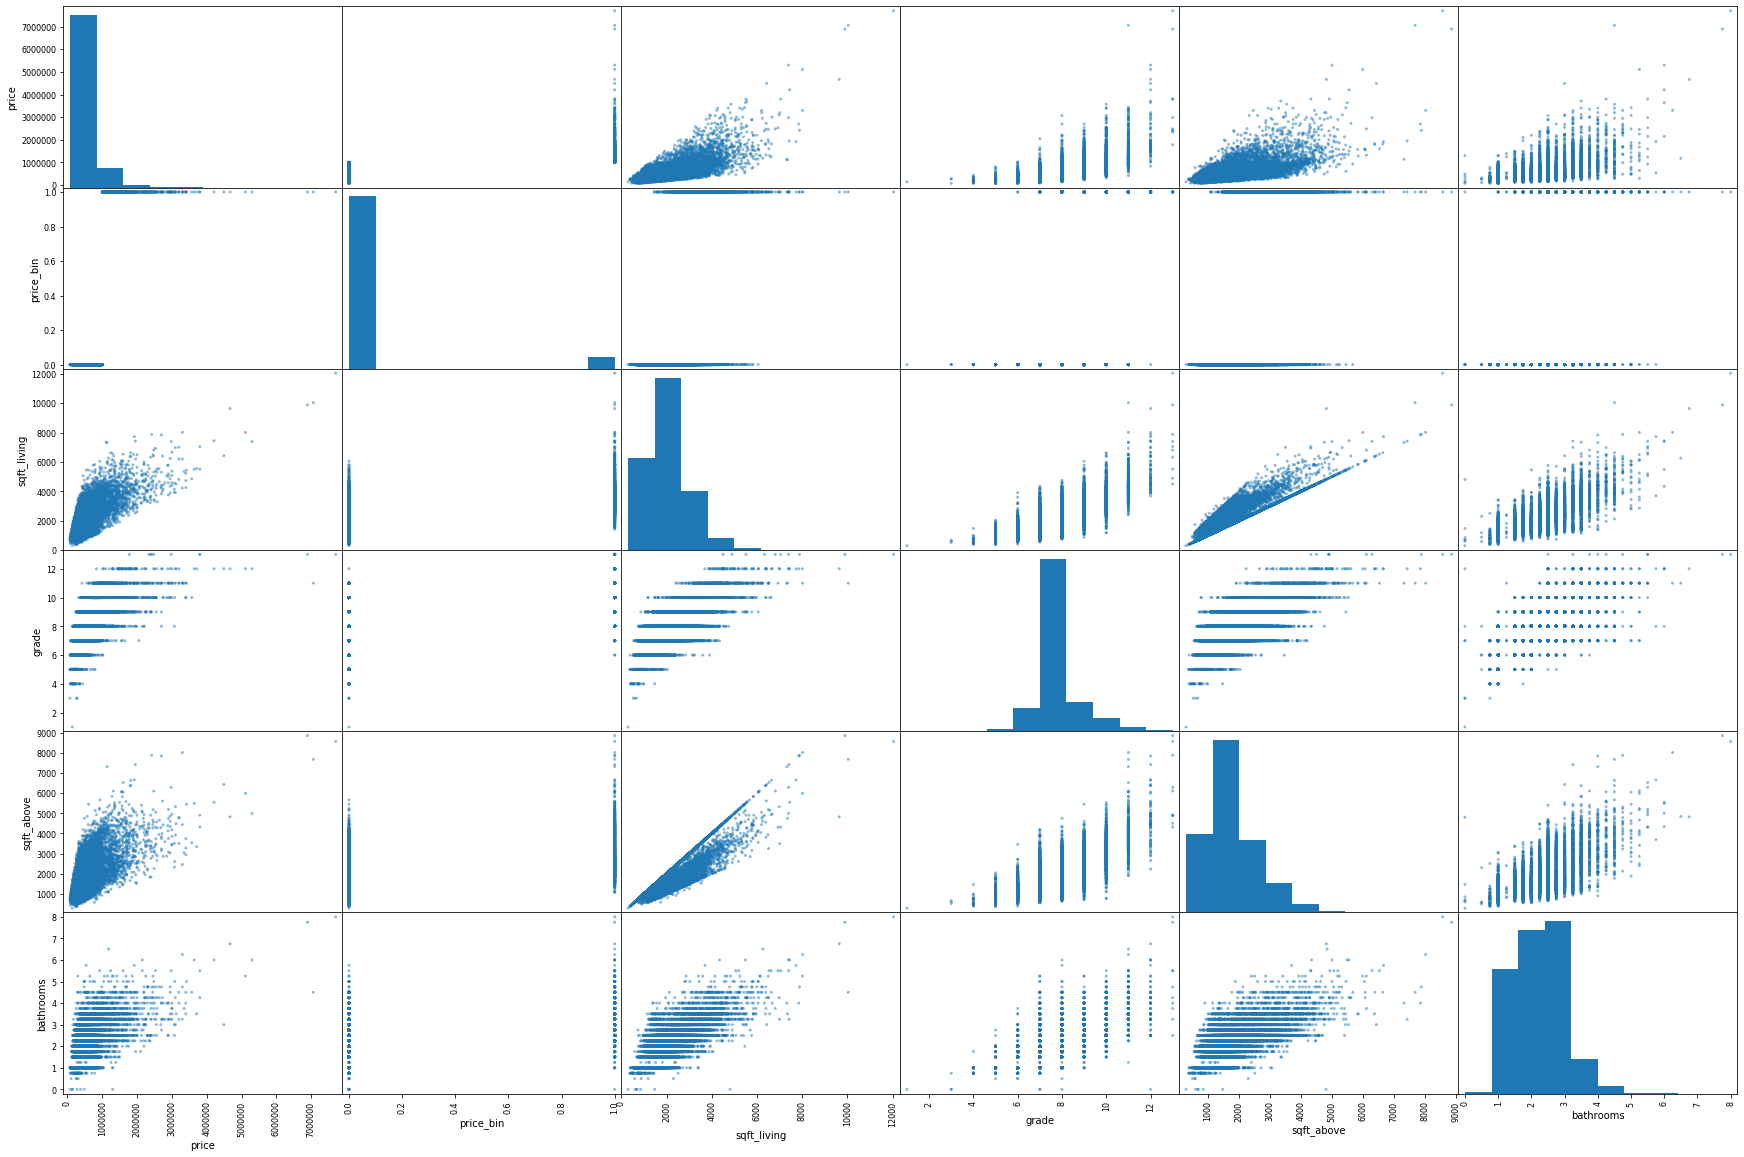

In [106]:
attributes = correlations.index[:6]
ax = pd.plotting.scatter_matrix(housing[attributes], figsize=(30, 20))

At this stage, we can start questioning if the 'grade' column is really the slope of the lot. It has a very high correlation with price, and at the same time, there seems to be no flat lots, with the majority of them having 7-8° (see below), which seems suspicious.

In [107]:
housing['grade'].value_counts()

7     7201
8     4879
9     2072
6     1620
10     915
11     306
5      188
12      69
4       26
13      10
3        3
1        1
Name: grade, dtype: int64

Since the data is for King County, WA, this seems to be a better, and more fitting description of grade:
Represents the construction quality of improvements. Grades run from grade 1 to 13. Generally defined as:

1-3 Falls short of minimum building standards. Normally cabin or inferior structure.

4 Generally older, low quality construction. Does not meet code.

5 Low construction costs and workmanship. Small, simple design.

6 Lowest grade currently meeting building code. Low quality materials and simple designs.

7 Average grade of construction and design. Commonly seen in plats and older sub-divisions.

8 Just above average in construction and design. Usually better materials in both the exterior and interior finish work.

9 Better architectural design with extra interior and exterior design and quality.

10 Homes of this quality generally have high quality features. Finish work is better and more design quality is seen in the floor plans. Generally have a larger square footage.

11 Custom design and higher quality finish work with added amenities of solid woods, bathroom fixtures and more luxurious options.

12 Custom design and excellent builders. All materials are of the highest quality and all conveniences are present.

13 Generally custom designed and built. Mansion level. Large amount of highest quality cabinet work, wood trim, marble, entry ways etc. 

SOURCE: https://info.kingcounty.gov/assessor/esales/Glossary.aspx?type=r

This would explain a very high correlation with price much bettar than the lot slope.

# Correlation Matrix

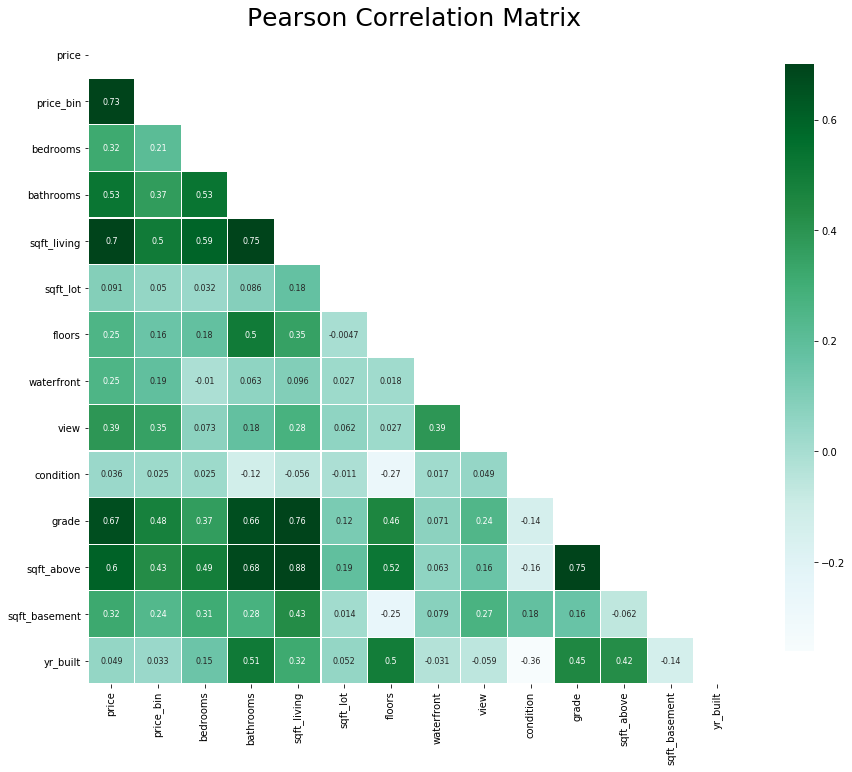

In [109]:
features = ['date', 'price', 'price_bin',
             'bedrooms', 'bathrooms', 'sqft_living',
             'sqft_lot', 'floors', 'waterfront',
            'view', 'condition', 'grade', 
            'sqft_above', 'sqft_basement', 'yr_built']
mask = np.zeros_like(housing[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(housing[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});